In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flight2018 = pd.read_csv('data/2018.csv')

In [3]:
flight2017 = pd.read_csv('data/2017.csv')

In [4]:
flight2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [5]:
flight2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674621 entries, 0 to 5674620
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [7]:
flight = pd.concat([flight2018, flight2017], axis=0)

In [8]:
flight

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,UA,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,...,206.0,189.0,171.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
5674617,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,190.0,183.0,159.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,134.0,123.0,104.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,92.0,66.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
##### duplicate dataset
flight3 = flight.copy()

In [130]:
flight3.isnull().sum(axis = 0)

FL_DATE                       0
OP_CARRIER                    0
OP_CARRIER_FL_NUM             0
ORIGIN                        0
DEST                          0
CRS_DEP_TIME                  0
DEP_TIME                 192625
DEP_DELAY                197577
TAXI_OUT                 197975
WHEELS_OFF               197970
WHEELS_ON                203920
TAXI_IN                  203920
CRS_ARR_TIME                  0
ARR_TIME                 203919
ARR_DELAY                232251
CANCELLED                     0
CANCELLATION_CODE      12688790
DIVERTED                      0
CRS_ELAPSED_TIME             17
ACTUAL_ELAPSED_TIME      229653
AIR_TIME                 229653
DISTANCE                      0
CARRIER_DELAY          10505884
WEATHER_DELAY          10505884
NAS_DELAY              10505884
SECURITY_DELAY         10505884
LATE_AIRCRAFT_DELAY    10505884
Unnamed: 27            12888067
dtype: int64

In [131]:
flight3['DEP_DELAY'] = flight3['DEP_DELAY'].apply(lambda x: x if x == x else -10000)

In [132]:
flight3 = flight3[flight3['DEP_DELAY'] != -10000]

In [133]:
late = flight3[flight3['DEP_DELAY'] > 0]
not_late = flight3[flight3['DEP_DELAY'] <= 0]

Delayed Departure: 4397115
On Time: 8293375


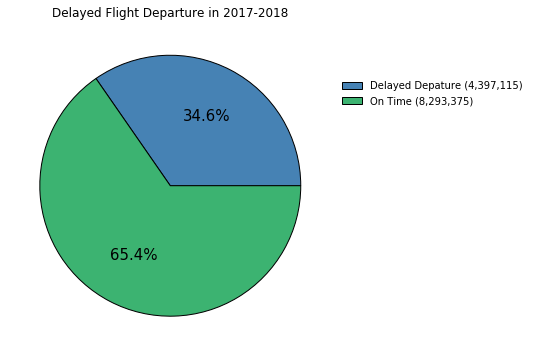

In [134]:
##### overall delayed flights vs non-delayed flights
late_count = late['DEP_DELAY'].count()
not_late_count = not_late['DEP_DELAY'].count()
total = flight3['DEP_DELAY'].count()
a = ['Flight']
legend = ['Delayed Depature (4,397,115)', 'On Time (8,293,375)']

print('Delayed Departure:',late_count)
print('On Time:',not_late_count)

##### plot pie chart
color = ['steelblue', 'mediumseagreen']
fig, ax = plt.subplots(figsize=(6,6))
ax.pie([late_count/total*100, not_late_count/total*100], colors=color, autopct='%1.1f%%', wedgeprops={"edgecolor":'black','linewidth': 1, 'antialiased': True}, textprops={'fontsize': 15})
ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))
ax.set_title('Delayed Flight Departure in 2017-2018')
plt.show()

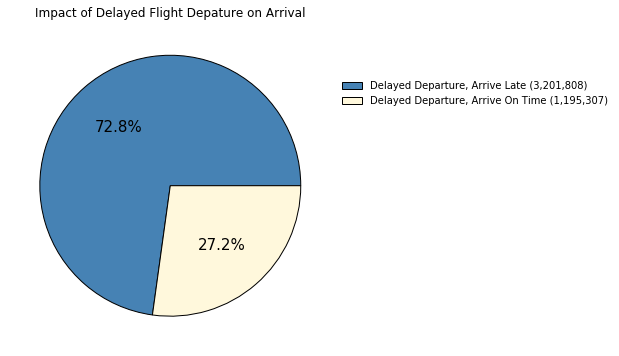

In [227]:
##### overall delayed flights, arriving on time
late1 = flight3[flight3['DEP_DELAY'] > 0]
not_late1 = late1[late1['ARR_DELAY'] <= 0]

late_count = late1['DEP_DELAY'].count()
not_late_count = not_late1['ARR_DELAY'].count()
arrival_late = late_count - not_late_count

legend = ['Delayed Departure, Arrive Late (3,201,808)', 'Delayed Departure, Arrive On Time (1,195,307)']

##### plot pie chart
color = ['steelblue', 'cornsilk']
fig, ax = plt.subplots(figsize=(6,6))
ax.pie([arrival_late/late_count*100, not_late_count/late_count*100], colors=color, autopct='%1.1f%%', wedgeprops={"edgecolor":'black','linewidth': 1, 'antialiased': True}, textprops={'fontsize': 15})
ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))
ax.set_title('Impact of Delayed Flight Depature on Arrival')
plt.show()

In [224]:
late1 = flight3[flight3['DEP_DELAY'] > 0]
not_late1 = late1[late1['ARR_DELAY'] <= 0]
print(late_count)
print(not_late_count)
arrival_late

4397115
1195307


3201808

In [135]:
##### drop column
flight3.drop(['Unnamed: 27'], axis=1, inplace=True)
flight3.drop(['CANCELLATION_CODE'], axis=1, inplace=True)

In [136]:
flight3

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,UA,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,...,0.0,206.0,189.0,171.0,1222.0,NaN,NaN,NaN,NaN,NaN
5674617,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,0.0,190.0,183.0,159.0,1120.0,NaN,NaN,NaN,NaN,NaN
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,0.0,134.0,123.0,104.0,846.0,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,0.0,99.0,92.0,66.0,414.0,NaN,NaN,NaN,NaN,NaN


In [137]:
flight3['CARRIER_DELAY'] = flight3['CARRIER_DELAY'].apply(lambda x: x if x>=0 else -1)
flight3['NAS_DELAY'] = flight3['NAS_DELAY'].apply(lambda x: x if x>=0 else -1)
flight3['WEATHER_DELAY'] = flight3['WEATHER_DELAY'].apply(lambda x: x if x>=0 else -1)
flight3['SECURITY_DELAY'] = flight3['SECURITY_DELAY'].apply(lambda x: x if x>=0 else -1)
flight3['LATE_AIRCRAFT_DELAY'] = flight3['LATE_AIRCRAFT_DELAY'].apply(lambda x: x if x>=0 else -1)

In [138]:
##### duplicate dataset
flight_modified = flight3.copy()

In [139]:
flight_modified = flight_modified[flight_modified['CARRIER_DELAY'] != -1]

In [140]:
flight_modified

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
11,2018-01-01,UA,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,0.0,72.0,80.0,48.0,316.0,121.0,0.0,8.0,0.0,0.0
14,2018-01-01,UA,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,0.0,121.0,118.0,99.0,763.0,0.0,11.0,0.0,0.0,62.0
15,2018-01-01,UA,2412,MCO,LAX,653,747.0,54.0,14.0,801.0,...,0.0,337.0,338.0,302.0,2218.0,54.0,0.0,1.0,0.0,0.0
16,2018-01-01,UA,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,...,0.0,386.0,339.0,319.0,2500.0,7.0,0.0,0.0,0.0,18.0
17,2018-01-01,UA,2410,RSW,EWR,1250,1337.0,47.0,12.0,1349.0,...,0.0,167.0,149.0,131.0,1068.0,29.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674583,2017-12-31,UA,2381,ORD,SAN,1225,1416.0,111.0,16.0,1432.0,...,0.0,266.0,258.0,239.0,1723.0,2.0,0.0,0.0,0.0,101.0
5674584,2017-12-31,UA,2384,EWR,FLL,1647,1826.0,99.0,21.0,1847.0,...,0.0,192.0,176.0,151.0,1065.0,7.0,0.0,0.0,0.0,76.0
5674586,2017-12-31,UA,2387,BZN,DEN,515,508.0,-7.0,77.0,625.0,...,0.0,105.0,142.0,61.0,524.0,0.0,0.0,30.0,0.0,0.0
5674607,2017-12-31,UA,2410,RSW,EWR,1250,1404.0,74.0,15.0,1419.0,...,0.0,167.0,154.0,133.0,1068.0,0.0,0.0,0.0,0.0,61.0


In [141]:
##### delay types
carrier_count = flight_modified[flight_modified['CARRIER_DELAY'] > 0]
weather_count = flight_modified[flight_modified['WEATHER_DELAY'] > 0]
NAS_count = flight_modified[flight_modified['NAS_DELAY'] > 0]
security_count = flight_modified[flight_modified['SECURITY_DELAY'] > 0]
late_aircraft_count = flight_modified[flight_modified['LATE_AIRCRAFT_DELAY'] > 0]

##### delay time
delay_time = flight_modified[flight_modified['DEP_DELAY'] > 0]

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


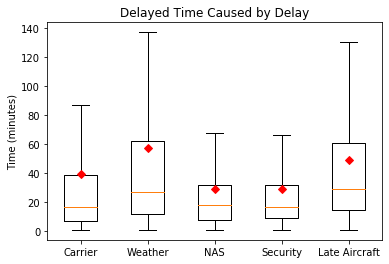

In [142]:
##### delayed time caused by delay
carrier = carrier_count['CARRIER_DELAY'].sum()/len(carrier_count)
weather = weather_count['WEATHER_DELAY'].sum()/len(weather_count)
NAS = NAS_count['NAS_DELAY'].sum()/len(NAS_count)
security = security_count['SECURITY_DELAY'].sum()/len(security_count)
late_aircraft = late_aircraft_count['LATE_AIRCRAFT_DELAY'].sum()/len(late_aircraft_count)

delays = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
x_pos = np.arange(len(delays))
      
##### boxplot
fig, ax = plt.subplots()
meanprops=dict(marker='D', markeredgecolor='red',markerfacecolor='red',markersize=5)
ax.boxplot([carrier_count['CARRIER_DELAY'], weather_count['WEATHER_DELAY'], NAS_count['NAS_DELAY'], security_count['SECURITY_DELAY'], late_aircraft_count['LATE_AIRCRAFT_DELAY']], 
           showfliers=False, 
           showmeans=True, 
           meanprops=meanprops)
ax.set_ylabel('Time (minutes)')
ax.set_xticks(x_pos+1)
ax.set_xticklabels(delays)
ax.set_title('Delayed Time Caused by Delay')
plt.show()

In [143]:
flight3

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,0.0,268.0,250.0,225.0,1605.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,0.0,99.0,83.0,65.0,414.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,0.0,134.0,126.0,106.0,846.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,0.0,190.0,182.0,157.0,1120.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,0.0,112.0,106.0,83.0,723.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,UA,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,...,0.0,206.0,189.0,171.0,1222.0,-1.0,-1.0,-1.0,-1.0,-1.0
5674617,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,0.0,190.0,183.0,159.0,1120.0,-1.0,-1.0,-1.0,-1.0,-1.0
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,0.0,134.0,123.0,104.0,846.0,-1.0,-1.0,-1.0,-1.0,-1.0
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,0.0,99.0,92.0,66.0,414.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [144]:
flight3.isnull().sum(axis = 0)

FL_DATE                    0
OP_CARRIER                 0
OP_CARRIER_FL_NUM          0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                5151
WHEELS_OFF              5151
WHEELS_ON              11080
TAXI_IN                11080
CRS_ARR_TIME               0
ARR_TIME               11079
ARR_DELAY              39262
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME          17
ACTUAL_ELAPSED_TIME    36801
AIR_TIME               36801
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
dtype: int64

In [145]:
##### extract month, day, and year
flight3['FL_DATE'] = pd.to_datetime(flight3['FL_DATE'])
flight3['year'] = flight3['FL_DATE'].dt.year
flight3['month'] = flight3['FL_DATE'].dt.month
flight3['day'] = flight3['FL_DATE'].dt.day

In [146]:
flight3['OP_CARRIER'].unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [147]:
##### replace airline code with airline name
flight3['OP_CARRIER'].replace({
    'NK':'Spirit Airlines (NK)',
    'MQ':'Envoy Air (MQ)',
    'OO':'SkyWest Airlines (OO)',
    'EV':'ExpressJet (EV)',
    'HA':'Hawaiian Airlines (HA)',
    'UA':'United Airlines (UA)',
    'VX':'Virgin America (VX)',
    'WN':'Southwest Airlines (WN)',
    'B6':'JetBlue Airways (B6)',
    'F9':'Frontier Airlines (F9)',
    'AA':'American Airlines (AA)',
    'AS':'Alaska Airlines (AS)',
    'DL':'Delta Air Lines (DL)',
    '9E':'Endeavor Air (9E)',
    'G4':'Allegiant Air (G4)',
    'OH':'PSA Airlines (OH)',
    'YV':'Mesa Airlines (YV)',
    'YX':'Republic Airways (YX)',
},inplace=True)

In [148]:
flight3['OP_CARRIER'].unique()

array(['United Airlines (UA)', 'Alaska Airlines (AS)',
       'Endeavor Air (9E)', 'JetBlue Airways (B6)', 'ExpressJet (EV)',
       'Frontier Airlines (F9)', 'Allegiant Air (G4)',
       'Hawaiian Airlines (HA)', 'Envoy Air (MQ)', 'Spirit Airlines (NK)',
       'PSA Airlines (OH)', 'SkyWest Airlines (OO)',
       'Virgin America (VX)', 'Southwest Airlines (WN)',
       'Mesa Airlines (YV)', 'Republic Airways (YX)',
       'American Airlines (AA)', 'Delta Air Lines (DL)'], dtype=object)

In [149]:
flight3['origin'] = flight3['ORIGIN']
flight3['destination'] = flight3['DEST']

In [150]:
Alabama = ['BHM', 'DHN', 'HSV', 'MOB', 'MGM']
Alaska = ['ANC', 'FAI', 'JNU', 'YAK', 'CDV', 'WRG', 'PSG', 'SIT', 'KTN', 'OME', 'OTZ', 'BRW', 'SCC', 'BET', 'ADQ', 'ADK', 'AKN', 'GST', 'DLG']
Arizona = ['FLG', 'PHX', 'TUS', 'YUM', 'IFP', 'AZA', 'PRC']
Arkansas = ['FYV', 'LIT', 'XNA', 'FSM', 'TXK']
California = ['BUR', 'FAT', 'LGB', 'LAX', 'OAK', 'ONT', 'PSP', 'SMF', 'SAN', 'SFO', 'SJC', 'SNA', 'BFL', 'SBA', 'ACV', 'SBP', 'RDD', 'CLD', 'MMH', 'SMX', 'MRY', 'CEC', 'STS', 'SCK']
Colorado = ['ASE', 'COS', 'DEN', 'GJT', 'PUB', 'DRO', 'HDN', 'EGE', 'MTJ', 'GUC']
Connecticut = ['BDL', 'HVN']
DistrictofColumbia =['IAD', 'DCA']
Delaware = ['ILG']
Florida = ['DAB', 'FLL', 'RSW', 'JAX', 'EYW', 'MIA', 'MCO', 'PNS', 'PIE', 'SRQ', 'TPA', 'PBI', 'PFN', 'VPS', 'ECP', 'TLH', 'GNV', 'UST', 'MLB', 'PGD', 'SFB']
Georgia =['ATL', 'AGS', 'SAV', 'CSG', 'ABY', 'VLD', 'BQK']
Hawaii = ['ITO', 'HNL', 'OGG', 'KOA', 'LIA', 'LIH']
Idaho = ['BOI', 'SUN', 'IDA', 'LWS', 'PIH', 'TWF']
Illinois = ['MDW', 'ORD', 'MLI', 'PIA', 'BMI', 'CMI', 'SPI', 'UIN', 'RFD', 'BLV']
Indiana = ['EVV', 'FWA', 'IND', 'SBN']
Iowa =['CID', 'DSM', 'SUX', 'ALO', 'DBQ']
Kansas = ['ICT', 'GCK', 'MHK', 'HYS', 'LBL', 'SLN']
Kentucky = ['LEX', 'SDF', 'PAH', 'OWB']
Louisiana = ['BTR', 'MSY', 'SHV', 'LFT', 'MLU', 'AEX', 'LCH']
Maine = ['AUG', 'BGR', 'PWM']
Maryland =['BWI', 'HGR']
Massachusetts = ['BOS', 'HYA', 'ACK', 'ORH', 'MVY']
Michigan = ['BTL', 'DTW', 'DET', 'FNT', 'GRR', 'AZO', 'LAN', 'MBS', 'CMX', 'APN', 'MQT', 'TVC', 'MKG' 'IMT', 'MKG', 'IMT', 'CIU', 'ESC', 'PLN']
Minnesota = ['DLH', 'MSP', 'RST', 'BJI', 'INL', 'HIB']
Mississippi = ['GPT', 'JAN', 'BRD', 'STC', 'PIB', 'MEI', 'GTR']
Missouri = ['MCI', 'STL', 'SGF', 'JLN', 'COU', 'CGI', 'BKG']
Montana = ['BIL', 'BZN', 'MSO', 'FCA', 'HLN', 'GTF', 'BTM', 'WYS']
Nebraska = ['LNK', 'OMA', 'GRI', 'BFF', 'LBF', 'EAR']
Nevada = ['LAS', 'RNO', 'EKO']
NewHampshire = ['MHT', 'PSM']
NewJersey = ['ACY', 'EWR', 'TTN']
NewMexico = ['ABQ', 'ALM', 'SAF', 'ROW', 'HOB']
NewYork = ['ALB', 'BUF', 'ISP', 'JFK', 'LGA', 'SWF', 'ROC', 'SYR', 'HPN', 'PBG', 'ELM', 'IAG', 'BGM', 'ITH', 'OGS', 'ART']
NorthCarolina = ['AVL', 'CLT', 'FAY', 'GSO', 'RDU', 'INT', 'ILM', 'EWN', 'OAJ', 'USA', 'PGV']
NorthDakota = ['BIS', 'FAR', 'DVL', 'JMS', 'MOT', 'ISN', 'DIK', 'GFK']
Ohio = ['CAK', 'CVG', 'CLE', 'CMH', 'DAY', 'TOL', 'LCK', 'YNG']
Oklahoma = ['OKC', 'TUL', 'LAW', 'SWO']
Oregon = ['EUG', 'PDX', 'HIO', 'SLE', 'MFR', 'RDM', 'OTH']
Pennsylvania = ['ABE', 'ERI', 'MDT', 'PHL', 'PIT', 'AVP', 'SCE', 'LBE']
RhodeIsland = ['PVD']
SouthCarolina = ['SHC', 'CAE', 'GSP', 'MYR', 'CHS', 'FLO', 'HHH']
SouthDakota = ['RAP', 'FSD', 'ABR']
Tennessee = ['TRI', 'CHA', 'TYS', 'MEM', 'BNA']
Texas = ['AMA', 'AUS', 'CRP', 'DAL', 'DFW', 'ELP', 'HOU', 'IAH', 'LBB', 'MAF', 'SAT', 'HRL', 'GGG', 'BRO', 'GRK', 'BPT', 'LRD', 'CLL', 'ACT', 'SPS', 'MFE', 'TYR', 'ABI', 'SJT', 'EFD', 'DRT', 'TKI']
Utah = ['SLC', 'SGU', 'VEL', 'CDC', 'CNY', 'PVU', 'OGD']
Vermont = ['BTV', 'MPV', 'RUT', 'CHO']
Virginia = ['IAD', 'PHF', 'ORF', 'RIC', 'ROA', 'LYH', 'SHD']
Washington = ['PSC', 'SEA', 'GEG', 'BLI']
WestVirginia = ['CRW', 'CKB', 'HTS', 'CRW', 'LWB']
Wisconsin = ['GRB', 'MSN', 'MKE', 'RHI', 'CWA', 'ATW', 'EAU', 'LSE']
Wyoming = ['CPR', 'CYS', 'JAC', 'RKS', 'GCC', 'COD', 'LAR']
Guam = ['GUM']
VirginIslands = ['STT', 'STX']
PueroRico = ['SJU', 'BQN', 'PSE']
Samoa = ['PPG']
NorthernMarianaIslands = ['SPN']

flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Alabama' if (x in Alabama) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Alaska' if (x in Alaska) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Arizona' if (x in Arizona) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Arkansas' if (x in Arkansas) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'California' if (x in California) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Colorado' if (x in Colorado) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Connecticut' if (x in Connecticut) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'District_of_Columbia' if (x in DistrictofColumbia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Delaware' if (x in Delaware) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Florida' if (x in Florida) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Georgia' if (x in Georgia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Hawaii' if (x in Hawaii) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Idaho' if (x in Idaho) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Illinois' if (x in Illinois) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Indiana' if (x in Indiana) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Iowa' if (x in Iowa) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Kansas' if (x in Kansas) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Kentucky' if (x in Kentucky) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Louisiana' if (x in Louisiana) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Maine' if (x in Maine) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Maryland' if (x in Maryland) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Massachusetts' if (x in Massachusetts) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Michigan' if (x in Michigan) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Minnesota' if (x in Minnesota) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Mississippi' if (x in Mississippi) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Missouri' if (x in Missouri) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Montana' if (x in Montana) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Nebraska' if (x in Nebraska) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Nevada' if (x in Nevada) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_Hampshire' if (x in NewHampshire) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_Jersey' if (x in NewJersey) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_Mexico' if (x in NewMexico) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'New_York' if (x in NewYork) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'North_Carolina' if (x in NorthCarolina) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'North_Dakota' if (x in NorthDakota) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Ohio' if (x in Ohio) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Oklahoma' if (x in Oklahoma) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Oregon' if (x in Oregon) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Pennsylvania' if (x in Pennsylvania) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Rhode_Island' if (x in RhodeIsland) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'South_Carolina' if (x in SouthCarolina) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'South_Dakota' if (x in SouthDakota) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Tennessee' if (x in Tennessee) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Texas' if (x in Texas) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Utah' if (x in Utah) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Vermont' if (x in Vermont) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Virginia' if (x in Virginia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Washington' if (x in Washington) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'West_Virginia' if (x in WestVirginia) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Wisconsin' if (x in Wisconsin) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Wyoming' if (x in Wyoming) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Guam' if (x in Guam) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'US_Virgin_Islands' if (x in VirginIslands) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Puero_Rico' if (x in PueroRico) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'American_Samoa' if (x in Samoa) else x)
flight3['DEST'] = flight3['DEST'].apply(lambda x: 'Northern_Mariana_Islands' if (x in NorthernMarianaIslands) else x)

flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Alabama' if (x in Alabama) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Alaska' if (x in Alaska) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Arizona' if (x in Arizona) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Arkansas' if (x in Arkansas) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'California' if (x in California) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Colorado' if (x in Colorado) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Connecticut' if (x in Connecticut) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'District_of_Columbia' if (x in DistrictofColumbia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Delaware' if (x in Delaware) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Florida' if (x in Florida) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Georgia' if (x in Georgia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Hawaii' if (x in Hawaii) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Idaho' if (x in Idaho) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Illinois' if (x in Illinois) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Indiana' if (x in Indiana) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Iowa' if (x in Iowa) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Kansas' if (x in Kansas) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Kentucky' if (x in Kentucky) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Louisiana' if (x in Louisiana) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Maine' if (x in Maine) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Maryland' if (x in Maryland) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Massachusetts' if (x in Massachusetts) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Michigan' if (x in Michigan) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Minnesota' if (x in Minnesota) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Mississippi' if (x in Mississippi) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Missouri' if (x in Missouri) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Montana' if (x in Montana) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Nebraska' if (x in Nebraska) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Nevada' if (x in Nevada) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_Hampshire' if (x in NewHampshire) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_Jersey' if (x in NewJersey) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_Mexico' if (x in NewMexico) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'New_York' if (x in NewYork) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'North_Carolina' if (x in NorthCarolina) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'North_Dakota' if (x in NorthDakota) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Ohio' if (x in Ohio) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Oklahoma' if (x in Oklahoma) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Oregon' if (x in Oregon) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Pennsylvania' if (x in Pennsylvania) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Rhode_Island' if (x in RhodeIsland) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'South_Carolina' if (x in SouthCarolina) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'South_Dakota' if (x in SouthDakota) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Tennessee' if (x in Tennessee) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Texas' if (x in Texas) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Utah' if (x in Utah) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Vermont' if (x in Vermont) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Virginia' if (x in Virginia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Washington' if (x in Washington) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'West_Virginia' if (x in WestVirginia) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Wisconsin' if (x in Wisconsin) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Wyoming' if (x in Wyoming) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Guam' if (x in Guam) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'US_Virgin_Islands' if (x in VirginIslands) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Puero_Rico' if (x in PueroRico) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'American_Samoa' if (x in Samoa) else x)
flight3['ORIGIN'] = flight3['ORIGIN'].apply(lambda x: 'Northern_Mariana_Islands' if (x in NorthernMarianaIslands) else x)

In [151]:
flight3['ORIGIN'].unique()

array(['New_Jersey', 'Nevada', 'California', 'Florida', 'Illinois',
       'Texas', 'Colorado', 'Virginia', 'Oregon', 'Tennessee', 'Wyoming',
       'Massachusetts', 'Louisiana', 'Washington', 'Utah',
       'North_Carolina', 'District_of_Columbia', 'Alaska', 'Minnesota',
       'New_York', 'Indiana', 'Connecticut', 'New_Mexico', 'Georgia',
       'Arizona', 'Pennsylvania', 'Maryland', 'Hawaii', 'Ohio',
       'South_Carolina', 'Puero_Rico', 'Wisconsin', 'Oklahoma', 'Montana',
       'Idaho', 'Michigan', 'Nebraska', 'Missouri', 'Iowa', 'Guam',
       'North_Dakota', 'South_Dakota', 'Maine', 'Mississippi', 'Vermont',
       'Alabama', 'Kentucky', 'Arkansas', 'US_Virgin_Islands',
       'Rhode_Island', 'Kansas', 'West_Virginia', 'New_Hampshire',
       'American_Samoa', 'Northern_Mariana_Islands'], dtype=object)

In [152]:
flight3['DEST'].unique()

array(['Colorado', 'California', 'Illinois', 'New_York', 'Nebraska',
       'Nevada', 'Iowa', 'New_Jersey', 'Ohio', 'Oregon', 'Georgia',
       'Vermont', 'Wyoming', 'Tennessee', 'Texas', 'Hawaii', 'Florida',
       'District_of_Columbia', 'Virginia', 'Utah', 'Kansas', 'Missouri',
       'Michigan', 'North_Carolina', 'Massachusetts', 'Arizona',
       'Montana', 'Louisiana', 'Minnesota', 'Indiana', 'Pennsylvania',
       'Maryland', 'Puero_Rico', 'Washington', 'Connecticut', 'Oklahoma',
       'New_Mexico', 'Maine', 'South_Carolina', 'Alaska', 'Idaho',
       'Wisconsin', 'Guam', 'North_Dakota', 'Mississippi', 'Alabama',
       'South_Dakota', 'Kentucky', 'Arkansas', 'US_Virgin_Islands',
       'Rhode_Island', 'West_Virginia', 'American_Samoa', 'New_Hampshire',
       'Northern_Mariana_Islands', 'FNL'], dtype=object)

In [153]:
flight3['planned departure'] = flight3['CRS_DEP_TIME']

In [154]:
##### 0 = morning, 1 = afternoon, 2 = evening, 3 = night
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 3 if (x < 600) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 0 if (x >=600 and x < 1200) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 1 if (x >=1200 and x < 1700) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 2 if (x >=1700 and x < 2000) else x)
flight3['CRS_DEP_TIME'] = flight3['CRS_DEP_TIME'].apply(lambda x: 3 if (x >=2000) else x)

In [155]:
##### 0 = morning, 1 = afternoon, 2 = evening, 3 = night
flight3['CRS_DEP_TIME'].replace({
    0:'morning',
    1:'afternoon',
    2:'evening',
    3:'night',
},inplace=True)

In [156]:
flight3

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,day,origin,destination,planned departure
0,2018-01-01,United Airlines (UA),2429,New_Jersey,Colorado,afternoon,1512.0,-5.0,15.0,1527.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,EWR,DEN,1517
1,2018-01-01,United Airlines (UA),2427,Nevada,California,morning,1107.0,-8.0,11.0,1118.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,LAS,SFO,1115
2,2018-01-01,United Airlines (UA),2426,California,Colorado,afternoon,1330.0,-5.0,15.0,1345.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,SNA,DEN,1335
3,2018-01-01,United Airlines (UA),2425,Florida,Illinois,afternoon,1552.0,6.0,19.0,1611.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,RSW,ORD,1546
4,2018-01-01,United Airlines (UA),2424,Illinois,New_York,morning,650.0,20.0,13.0,703.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,ORD,ALB,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines (UA),2421,Texas,Nevada,morning,744.0,-6.0,14.0,758.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,IAH,LAS,750
5674617,2017-12-31,United Airlines (UA),2425,Florida,Illinois,afternoon,1602.0,-9.0,12.0,1614.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,RSW,ORD,1611
5674618,2017-12-31,United Airlines (UA),2426,California,Colorado,afternoon,1334.0,-1.0,9.0,1343.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,SNA,DEN,1335
5674619,2017-12-31,United Airlines (UA),2427,Nevada,California,morning,1107.0,-8.0,11.0,1118.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,LAS,SFO,1115


In [157]:
flight3['CRS_DEP_TIME'].unique()

array(['afternoon', 'morning', 'night', 'evening'], dtype=object)

In [158]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12690490 entries, 0 to 5674620
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  DIVERTED             float64       
 17  CRS_ELAPSED_TIME     float64       
 18  ACTUAL_ELAPSED_TIME  float64       
 19  AIR_TIME            

In [159]:
##### duplicate dataset
flight2 = flight3.copy()
flight2

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,day,origin,destination,planned departure
0,2018-01-01,United Airlines (UA),2429,New_Jersey,Colorado,afternoon,1512.0,-5.0,15.0,1527.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,EWR,DEN,1517
1,2018-01-01,United Airlines (UA),2427,Nevada,California,morning,1107.0,-8.0,11.0,1118.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,LAS,SFO,1115
2,2018-01-01,United Airlines (UA),2426,California,Colorado,afternoon,1330.0,-5.0,15.0,1345.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,SNA,DEN,1335
3,2018-01-01,United Airlines (UA),2425,Florida,Illinois,afternoon,1552.0,6.0,19.0,1611.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,RSW,ORD,1546
4,2018-01-01,United Airlines (UA),2424,Illinois,New_York,morning,650.0,20.0,13.0,703.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,ORD,ALB,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines (UA),2421,Texas,Nevada,morning,744.0,-6.0,14.0,758.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,IAH,LAS,750
5674617,2017-12-31,United Airlines (UA),2425,Florida,Illinois,afternoon,1602.0,-9.0,12.0,1614.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,RSW,ORD,1611
5674618,2017-12-31,United Airlines (UA),2426,California,Colorado,afternoon,1334.0,-1.0,9.0,1343.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,SNA,DEN,1335
5674619,2017-12-31,United Airlines (UA),2427,Nevada,California,morning,1107.0,-8.0,11.0,1118.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,LAS,SFO,1115


In [160]:
##### delay time
delay_time = flight2[flight2['DEP_DELAY'] > 0]

In [161]:
##### delayed time in the morning, afteroon, evening, and at night
morning_count = delay_time[delay_time['CRS_DEP_TIME'] == 'morning']
afternoon_count = delay_time[delay_time['CRS_DEP_TIME'] == 'afternoon']
evening_count = delay_time[delay_time['CRS_DEP_TIME'] == 'evening']
night_count = delay_time[delay_time['CRS_DEP_TIME'] == 'night']

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


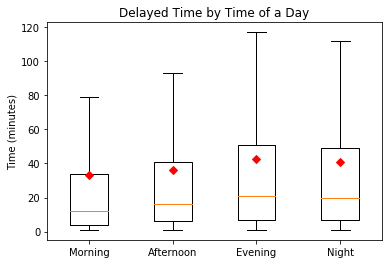

In [162]:
##### delayed time in the morning, afteroon, evening, and at night
morning = morning_count['DEP_DELAY'].sum()/len(morning_count)
afternoon = afternoon_count['DEP_DELAY'].sum()/len(afternoon_count)
evening = evening_count['DEP_DELAY'].sum()/len(evening_count)
night = night_count['DEP_DELAY'].sum()/len(night_count)

delays = ['Morning', 'Afternoon', 'Evening', 'Night']
x_pos = np.arange(len(delays))

##### boxplot
fig, ax = plt.subplots()
meanprops=dict(marker='D', markeredgecolor='red',markerfacecolor='red',markersize=5)
ax.boxplot([morning_count['DEP_DELAY'], afternoon_count['DEP_DELAY'], evening_count['DEP_DELAY'], night_count['DEP_DELAY']],
            showfliers=False, 
            showmeans=True, 
            meanprops=meanprops)
ax.set_ylabel('Time (minutes)')
ax.set_xticks(x_pos+1)
ax.set_xticklabels(delays)
ax.set_title('Delayed Time by Time of a Day')
plt.show()

In [163]:
delay_time

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,day,origin,destination,planned departure
3,2018-01-01,United Airlines (UA),2425,Florida,Illinois,afternoon,1552.0,6.0,19.0,1611.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,RSW,ORD,1546
4,2018-01-01,United Airlines (UA),2424,Illinois,New_York,morning,650.0,20.0,13.0,703.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,ORD,ALB,630
5,2018-01-01,United Airlines (UA),2422,Illinois,Nebraska,night,2244.0,3.0,15.0,2259.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,ORD,OMA,2241
8,2018-01-01,United Airlines (UA),2419,California,New_Jersey,night,2237.0,13.0,10.0,2247.0,...,-1.0,-1.0,-1.0,-1.0,2018,1,1,SMF,EWR,2224
11,2018-01-01,United Airlines (UA),2416,Illinois,Ohio,night,2300.0,121.0,24.0,2324.0,...,0.0,8.0,0.0,0.0,2018,1,1,ORD,CLE,2059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674598,2017-12-31,United Airlines (UA),2401,New_Jersey,North_Carolina,morning,830.0,5.0,16.0,846.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,EWR,CLT,825
5674604,2017-12-31,United Airlines (UA),2407,Georgia,New_Jersey,morning,612.0,6.0,24.0,636.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,SAV,EWR,606
5674607,2017-12-31,United Airlines (UA),2410,Florida,New_Jersey,afternoon,1404.0,74.0,15.0,1419.0,...,0.0,0.0,0.0,61.0,2017,12,31,RSW,EWR,1250
5674611,2017-12-31,United Airlines (UA),2415,New_Jersey,Oregon,morning,850.0,25.0,14.0,904.0,...,-1.0,-1.0,-1.0,-1.0,2017,12,31,EWR,PDX,825


In [164]:
#delay_time['DEP_DELAY'].min()

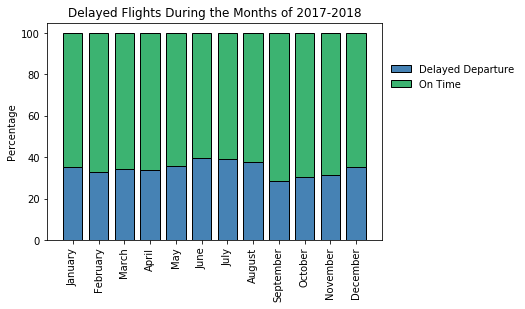

In [200]:
##### delayed flights during the Months of 2017-2018
month_count = delay_time.groupby('month')['DEP_DELAY'].count()
not_delayed = flight2.groupby('month')['DEP_DELAY'].count() - month_count
total = flight2.groupby('month')['DEP_DELAY'].count()

#sort = (month_count/total).sort_values(ascending=False)
#sort_month = sort.index.tolist()

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
legend = ['Delayed Departure', 'On Time']

##### plot graph
fig, ax = plt.subplots()
ax.bar(np.arange(month_count.shape[0]), month_count/total*100, color='steelblue', edgecolor="black", width=0.75)
ax.bar(np.arange(month_count.shape[0]), not_delayed/total*100, bottom=month_count/total*100, edgecolor="black", color = 'mediumseagreen', width=0.75)
ax.set_xticks(np.arange(month_count.shape[0]))
ax.set_xticklabels(month, rotation=90)
ax.set_xlim(-1,month_count.shape[0])
ax.set_ylabel('Percentage')
ax.set_title('Delayed Flights During the Months of 2017-2018')
ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))

plt.show()

In [166]:
##### delayed time during the months of 2017-2018
jan = delay_time[delay_time['month'] == 1]
feb = delay_time[delay_time['month'] == 2]
mar = delay_time[delay_time['month'] == 3]
apr = delay_time[delay_time['month'] == 4]
may = delay_time[delay_time['month'] == 5]
jun = delay_time[delay_time['month'] == 6]
jul = delay_time[delay_time['month'] == 7]
aug = delay_time[delay_time['month'] == 8]
sep = delay_time[delay_time['month'] == 9]
oct = delay_time[delay_time['month'] == 10]
nov = delay_time[delay_time['month'] == 11]
dec = delay_time[delay_time['month'] == 12]

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


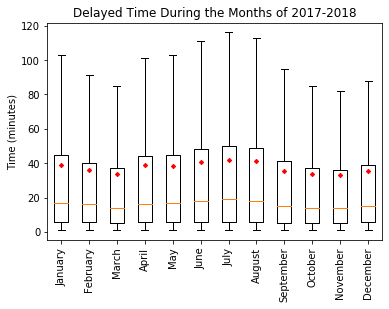

In [167]:
##### delayed time during the months of 2017-2018
sum = delay_time.groupby('month')['DEP_DELAY'].sum()

month_mean=[]
for i in range(1,sum.shape[0]+1):
    m = sum[i]/len(delay_time[delay_time['month'] == i])
    month_mean.append(m)
month_mean

month_count = delay_time.groupby('month')['DEP_DELAY'].count()

delays = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x_pos = np.arange(len(delays))

##### boxplot
fig, ax = plt.subplots()
meanprops=dict(marker='D', markeredgecolor='red',markerfacecolor='red',markersize=3)
ax.boxplot([jan['DEP_DELAY'], feb['DEP_DELAY'], mar['DEP_DELAY'], apr['DEP_DELAY'], may['DEP_DELAY'], jun['DEP_DELAY'], jul['DEP_DELAY'], aug['DEP_DELAY'], sep['DEP_DELAY'], oct['DEP_DELAY'], nov['DEP_DELAY'], dec['DEP_DELAY']],
            showfliers=False, 
            showmeans=True, 
            meanprops=meanprops)
ax.set_ylabel('Time (minutes)')
ax.set_xticks(x_pos+1)
ax.set_xticklabels(delays)
ax.set_xticklabels(month, rotation=90)
ax.set_title('Delayed Time During the Months of 2017-2018')
plt.show()

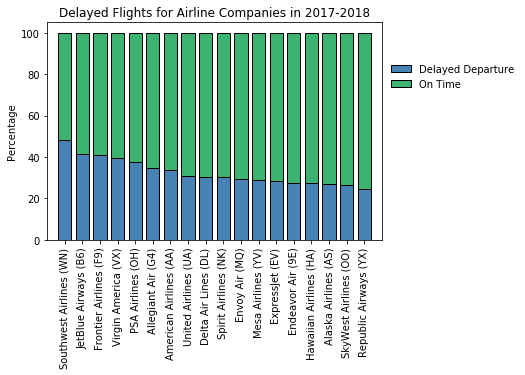

In [201]:
##### delayed flights for airline companies in 2017-2018
airline_count = delay_time.groupby('OP_CARRIER')['DEP_DELAY'].count()
not_delayed = flight2.groupby('OP_CARRIER')['DEP_DELAY'].count() - airline_count
total = flight2.groupby('OP_CARRIER')['DEP_DELAY'].count()

sort = (airline_count/total).sort_values(ascending=False)
sort_airlines = sort.index.tolist()

airlines = airline_count.index.tolist()
legend = ['Delayed Departure', 'On Time']

##### plot graph
fig, ax = plt.subplots()
ax.bar(np.arange(airline_count.shape[0]), -np.sort(-airline_count/total*100), color='steelblue', edgecolor="black", width=0.75)
ax.bar(np.arange(airline_count.shape[0]), np.sort(not_delayed/total*100), bottom=-np.sort(-airline_count/total*100), edgecolor="black", color = 'mediumseagreen', width=0.75)
ax.set_xticks(np.arange(airline_count.shape[0]))
ax.set_xticklabels(sort_airlines, rotation=90)
ax.set_ylabel('Percentage')
ax.set_xlim(-1,airline_count.shape[0])
ax.set_title('Delayed Flights for Airline Companies in 2017-2018')
ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))

plt.show()

In [169]:
##### delayed time for airline companies in 2017-2018
aas = delay_time[delay_time['OP_CARRIER'] == 'Alaska Airlines (AS)']
g4 = delay_time[delay_time['OP_CARRIER'] == 'Allegiant Air (G4)']
aa = delay_time[delay_time['OP_CARRIER'] == 'American Airlines (AA)']
dl = delay_time[delay_time['OP_CARRIER'] == 'Delta Air Lines (DL)']
e = delay_time[delay_time['OP_CARRIER'] == 'Endeavor Air (9E)']
mq = delay_time[delay_time['OP_CARRIER'] == 'Envoy Air (MQ)']
ev = delay_time[delay_time['OP_CARRIER'] == 'ExpressJet (EV)']
f9 = delay_time[delay_time['OP_CARRIER'] == 'Frontier Airlines (F9)']
ha = delay_time[delay_time['OP_CARRIER'] == 'Hawaiian Airlines (HA)']
b6 = delay_time[delay_time['OP_CARRIER'] == 'JetBlue Airways (B6)']
yv = delay_time[delay_time['OP_CARRIER'] == 'Mesa Airlines (YV)']
oh = delay_time[delay_time['OP_CARRIER'] == 'PSA Airlines (OH)']
yx = delay_time[delay_time['OP_CARRIER'] == 'Republic Airways (YX)']
oo = delay_time[delay_time['OP_CARRIER'] == 'SkyWest Airlines (OO)']
wn = delay_time[delay_time['OP_CARRIER'] == 'Southwest Airlines (WN)']
nk = delay_time[delay_time['OP_CARRIER'] == 'Spirit Airlines (NK)']
ua = delay_time[delay_time['OP_CARRIER'] == 'United Airlines (UA)']
vx = delay_time[delay_time['OP_CARRIER'] == 'Virgin America (VX)']

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


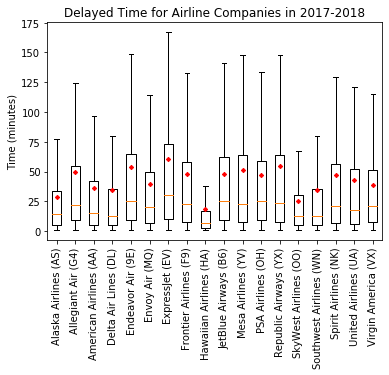

In [170]:
##### boxplot
airlines = airline_count.index.tolist()
x_pos = np.arange(len(airlines))

fig, ax = plt.subplots()
meanprops=dict(marker='D', markeredgecolor='red',markerfacecolor='red',markersize=3)
ax.boxplot([aas['DEP_DELAY'], 
            g4['DEP_DELAY'], 
            aa['DEP_DELAY'], 
            dl['DEP_DELAY'], 
            e['DEP_DELAY'], 
            mq['DEP_DELAY'], 
            ev['DEP_DELAY'], 
            f9['DEP_DELAY'], 
            ha['DEP_DELAY'], 
            b6['DEP_DELAY'], 
            yv['DEP_DELAY'], 
            yx['DEP_DELAY'],
            oo['DEP_DELAY'], 
            wn['DEP_DELAY'], 
            dl['DEP_DELAY'], 
            nk['DEP_DELAY'], 
            ua['DEP_DELAY'], 
            vx['DEP_DELAY']],
            showfliers=False, 
            showmeans=True, 
            meanprops=meanprops)
ax.set_ylabel('Time (minutes)')
ax.set_xticks(x_pos+1)
ax.set_xticklabels(airlines)
ax.set_xticklabels(airlines, rotation=90)
ax.set_title('Delayed Time for Airline Companies in 2017-2018')
plt.show()

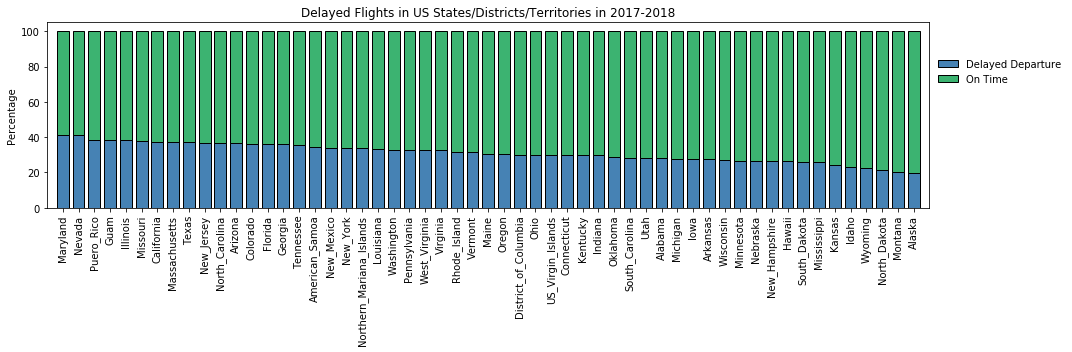

In [202]:
##### delays for states/districts/territories in 2017-2018
state_count = delay_time.groupby('ORIGIN')['DEP_DELAY'].count()
not_delayed = flight2.groupby('ORIGIN')['DEP_DELAY'].count() - state_count
total = flight2.groupby('ORIGIN')['DEP_DELAY'].count()

sort = (state_count/total).sort_values(ascending=False)
sort_state = sort.index.tolist()

state = state_count.index.tolist()
legend = ['Delayed Departure', 'On Time']

##### plot graph
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(np.arange(state_count.shape[0]), -np.sort(-state_count/total*100), color='steelblue', edgecolor="black",  width=0.75)
ax.bar(np.arange(state_count.shape[0]), np.sort(not_delayed/total*100), bottom=-np.sort(-state_count/total*100), edgecolor="black", color = 'mediumseagreen', width=0.75)
ax.set_xticks(np.arange(state_count.shape[0])), 
ax.set_xticklabels(sort_state, rotation=90)
ax.set_ylabel('Percentage')
ax.set_xlim(-1,state_count.shape[0])
ax.set_ylim(0,105)
ax.set_title('Delayed Flights in US States/Districts/Territories in 2017-2018')
ax.legend(legend, frameon=False, bbox_to_anchor=(1,0.85))

plt.tight_layout()
plt.show()

In [190]:
delay_time['ORIGIN'].unique()

array(['Florida', 'Illinois', 'California', 'New_Jersey', 'Tennessee',
       'Wyoming', 'Massachusetts', 'Louisiana', 'District_of_Columbia',
       'Minnesota', 'New_York', 'Indiana', 'Connecticut', 'Georgia',
       'Colorado', 'Pennsylvania', 'Texas', 'Maryland', 'Oregon',
       'South_Carolina', 'Puero_Rico', 'Washington', 'Montana', 'Arizona',
       'Alaska', 'Michigan', 'Nevada', 'Ohio', 'Nebraska', 'Hawaii',
       'North_Carolina', 'Virginia', 'Missouri', 'Iowa', 'Utah',
       'South_Dakota', 'Maine', 'Wisconsin', 'North_Dakota', 'Alabama',
       'Vermont', 'New_Mexico', 'US_Virgin_Islands', 'Rhode_Island',
       'Kansas', 'Mississippi', 'Oklahoma', 'Kentucky', 'Arkansas',
       'West_Virginia', 'Idaho', 'New_Hampshire', 'American_Samoa',
       'Guam', 'Northern_Mariana_Islands'], dtype=object)

In [191]:
##### delays for states/districts/territories in 2015-2018
Florida = delay_time[delay_time['ORIGIN'] == 'Florida']
Minnesota = delay_time[delay_time['ORIGIN'] == 'Minnesota']
Tennessee = delay_time[delay_time['ORIGIN'] == 'Tennessee']
Illinois = delay_time[delay_time['ORIGIN'] == 'Illinois']
California = delay_time[delay_time['ORIGIN'] == 'California']
Michigan = delay_time[delay_time['ORIGIN'] == 'Michigan']
Texas = delay_time[delay_time['ORIGIN'] == 'Texas']
Missouri = delay_time[delay_time['ORIGIN'] == 'Missouri']
Colorado = delay_time[delay_time['ORIGIN'] == 'Colorado']
Maryland = delay_time[delay_time['ORIGIN'] == 'Maryland']

Arizona = delay_time[delay_time['ORIGIN'] == 'Arizona']
New_York = delay_time[delay_time['ORIGIN'] == 'New_York']
New_Jersey = delay_time[delay_time['ORIGIN'] == 'New_Jersey']
Louisiana = delay_time[delay_time['ORIGIN'] == 'Louisiana']
South_Carolina = delay_time[delay_time['ORIGIN'] == 'South_Carolina']
Nevada = delay_time[delay_time['ORIGIN'] == 'Nevada']
Utah = delay_time[delay_time['ORIGIN'] == 'Utah']
Idaho = delay_time[delay_time['ORIGIN'] == 'Idaho']
Alabama = delay_time[delay_time['ORIGIN'] == 'Alabama']
Kansas = delay_time[delay_time['ORIGIN'] == 'Kansas']

Georgia = delay_time[delay_time['ORIGIN'] == 'Georgia']
Nebraska = delay_time[delay_time['ORIGIN'] == 'Nebraska']
Montana = delay_time[delay_time['ORIGIN'] == 'Montana']
Wyoming = delay_time[delay_time['ORIGIN'] == 'Wyoming']
Arkansas = delay_time[delay_time['ORIGIN'] == 'Arkansas']
Wisconsin = delay_time[delay_time['ORIGIN'] == 'Wisconsin']
Oregon = delay_time[delay_time['ORIGIN'] == 'Oregon']
Washington = delay_time[delay_time['ORIGIN'] == 'Washington']
North_Dakota = delay_time[delay_time['ORIGIN'] == 'North_Dakota']
New_Mexico = delay_time[delay_time['ORIGIN'] == 'New_Mexico']

Ohio = delay_time[delay_time['ORIGIN'] == 'Ohio']
Hawaii = delay_time[delay_time['ORIGIN'] == 'Hawaii']
Oklahoma = delay_time[delay_time['ORIGIN'] == 'Oklahoma']
South_Dakota = delay_time[delay_time['ORIGIN'] == 'South_Dakota']
North_Carolina = delay_time[delay_time['ORIGIN'] == 'North_Carolina']
Mississippi = delay_time[delay_time['ORIGIN'] == 'Mississippi']
District_of_Columbia = delay_time[delay_time['ORIGIN'] == 'District_of_Columbia']
Guam = delay_time[delay_time['ORIGIN'] == 'Guam']
Iowa = delay_time[delay_time['ORIGIN'] == 'Iowa']
Massachusetts = delay_time[delay_time['ORIGIN'] == 'Massachusetts']

Pennsylvania = delay_time[delay_time['ORIGIN'] == 'Pennsylvania']
US_Virgin_Islands = delay_time[delay_time['ORIGIN'] == 'US_Virgin_Islands']
Connecticut = delay_time[delay_time['ORIGIN'] == 'Connecticut']
Indiana = delay_time[delay_time['ORIGIN'] == 'Indiana']
New_Hampshire = delay_time[delay_time['ORIGIN'] == 'New_Hampshire']
Rhode_Island = delay_time[delay_time['ORIGIN'] == 'Rhode_Island']
Puero_Rico = delay_time[delay_time['ORIGIN'] == 'Puero_Rico']
Virginia = delay_time[delay_time['ORIGIN'] == 'Virginia']
Alaska = delay_time[delay_time['ORIGIN'] == 'Alaska']
Kentucky = delay_time[delay_time['ORIGIN'] == 'Kentucky']

West_Virginia = delay_time[delay_time['ORIGIN'] == 'West_Virginia']
#Delaware = delay_time[delay_time['ORIGIN'] == 'Delaware']
Vermont = delay_time[delay_time['ORIGIN'] == 'Vermont']
Maine = delay_time[delay_time['ORIGIN'] == 'Maine']
American_Samoa = delay_time[delay_time['ORIGIN'] == 'American_Samoa']
Northern_Mariana_Islands = delay_time[delay_time['ORIGIN'] == 'Northern_Mariana_Islands']

C:\Users\wcjohnchen\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


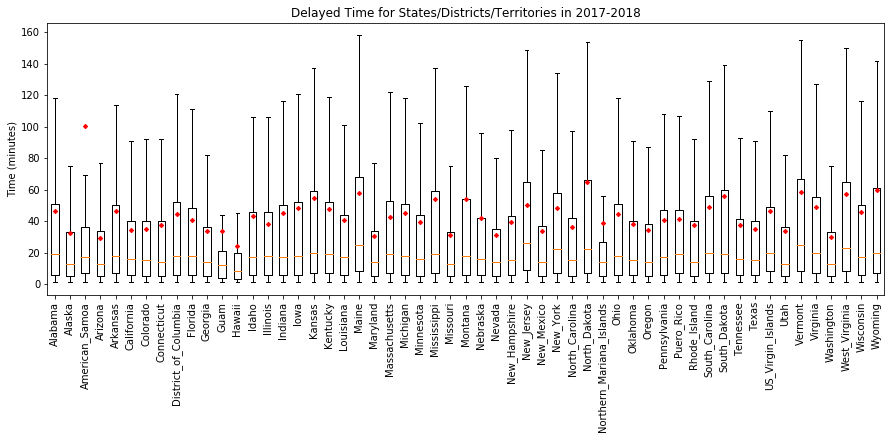

In [192]:
##### boxplot
states_ = state_count.index.tolist()
x_pos = np.arange(len(states_))

fig, ax = plt.subplots(figsize=(15,5))
meanprops=dict(marker='D', markeredgecolor='red',markerfacecolor='red',markersize=3)
ax.boxplot([Alabama['DEP_DELAY'], 
            Alaska['DEP_DELAY'], 
            American_Samoa['DEP_DELAY'], 
            Arizona['DEP_DELAY'], 
            Arkansas['DEP_DELAY'], 
            California['DEP_DELAY'], 
            Colorado['DEP_DELAY'], 
            Connecticut['DEP_DELAY'], 
            #Delaware['DEP_DELAY'], 
            District_of_Columbia['DEP_DELAY'], 
            Florida['DEP_DELAY'],
            Georgia['DEP_DELAY'],
            Guam['DEP_DELAY'],
            Hawaii['DEP_DELAY'], 
            Idaho['DEP_DELAY'], 
            Illinois['DEP_DELAY'], 
            Indiana['DEP_DELAY'], 
            Iowa['DEP_DELAY'], 
            Kansas['DEP_DELAY'],
            Kentucky['DEP_DELAY'],           
            Louisiana['DEP_DELAY'],
            Maine['DEP_DELAY'],
            Maryland['DEP_DELAY'],
            Massachusetts['DEP_DELAY'], 
            Michigan['DEP_DELAY'], 
            Minnesota['DEP_DELAY'], 
            Mississippi['DEP_DELAY'], 
            Missouri['DEP_DELAY'], 
            Montana['DEP_DELAY'], 
            Nebraska['DEP_DELAY'],
            Nevada['DEP_DELAY'],
            New_Hampshire['DEP_DELAY'],
            New_Jersey['DEP_DELAY'],
            New_Mexico['DEP_DELAY'], 
            New_York['DEP_DELAY'], 
            North_Carolina['DEP_DELAY'], 
            North_Dakota['DEP_DELAY'], 
            Northern_Mariana_Islands['DEP_DELAY'], 
            Ohio['DEP_DELAY'], 
            Oklahoma['DEP_DELAY'],        
            Oregon['DEP_DELAY'],
            Pennsylvania['DEP_DELAY'],
            Puero_Rico['DEP_DELAY'],
            Rhode_Island['DEP_DELAY'], 
            South_Carolina['DEP_DELAY'], 
            South_Dakota['DEP_DELAY'], 
            Tennessee['DEP_DELAY'], 
            Texas['DEP_DELAY'], 
            US_Virgin_Islands['DEP_DELAY'], 
            Utah['DEP_DELAY'],
            Vermont['DEP_DELAY'],
            Virginia['DEP_DELAY'],
            Washington['DEP_DELAY'],
            West_Virginia['DEP_DELAY'], 
            Wisconsin['DEP_DELAY'], 
            Wyoming['DEP_DELAY']],
            showfliers=False, 
            showmeans=True, 
            meanprops=meanprops)
ax.set_ylabel('Time (minutes)')
ax.set_xticks(x_pos+1)
ax.set_xticklabels(states_)
ax.set_xticklabels(states_, rotation=90)
ax.set_title('Delayed Time for States/Districts/Territories in 2017-2018')
plt.show()

In [193]:
data = flight2.copy()
data['CRS_DEP_TIME1'] = data['CRS_DEP_TIME']
data['ORIGIN1'] = data['ORIGIN']
data['DEST1'] = data['DEST']

In [194]:
data = pd.get_dummies(data, prefix='time', columns=['CRS_DEP_TIME'])
data = pd.get_dummies(data, prefix='depart', columns=['ORIGIN'])
data = pd.get_dummies(data, prefix='arrive', columns=['DEST'])

In [195]:
##### remove dummy variable degree of freedom -1
data.drop(['time_morning', 'depart_American_Samoa', 'arrive_American_Samoa'], axis=1, inplace=True)

In [197]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12690490 entries, 0 to 5674620
Data columns (total 144 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FL_DATE                          datetime64[ns]
 1   OP_CARRIER                       object        
 2   OP_CARRIER_FL_NUM                int64         
 3   DEP_TIME                         float64       
 4   DEP_DELAY                        float64       
 5   TAXI_OUT                         float64       
 6   WHEELS_OFF                       float64       
 7   WHEELS_ON                        float64       
 8   TAXI_IN                          float64       
 9   CRS_ARR_TIME                     int64         
 10  ARR_TIME                         float64       
 11  ARR_DELAY                        float64       
 12  CANCELLED                        float64       
 13  DIVERTED                         float64       
 14  CRS_ELAPSED_TIME                

In [198]:
data

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,arrive_Tennessee,arrive_Texas,arrive_US_Virgin_Islands,arrive_Utah,arrive_Vermont,arrive_Virginia,arrive_Washington,arrive_West_Virginia,arrive_Wisconsin,arrive_Wyoming
0,2018-01-01,United Airlines (UA),2429,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,United Airlines (UA),2427,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,United Airlines (UA),2426,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,United Airlines (UA),2425,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,United Airlines (UA),2424,650.0,20.0,13.0,703.0,926.0,10.0,922,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674616,2017-12-31,United Airlines (UA),2421,744.0,-6.0,14.0,758.0,849.0,4.0,916,...,0,0,0,0,0,0,0,0,0,0
5674617,2017-12-31,United Airlines (UA),2425,1602.0,-9.0,12.0,1614.0,1753.0,12.0,1821,...,0,0,0,0,0,0,0,0,0,0
5674618,2017-12-31,United Airlines (UA),2426,1334.0,-1.0,9.0,1343.0,1627.0,10.0,1649,...,0,0,0,0,0,0,0,0,0,0
5674619,2017-12-31,United Airlines (UA),2427,1107.0,-8.0,11.0,1118.0,1224.0,15.0,1254,...,0,0,0,0,0,0,0,0,0,0


In [199]:
data.to_csv("data/modified_data.csv", index = False)